<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [75]:
from sklearn.decomposition import PCA

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [76]:
sd = pd.read_csv('./datasets/speed_dating.csv')

In [77]:
sd.columns

Index(['subject_id', 'wave', 'like_sports', 'like_tvsports', 'like_exercise',
       'like_food', 'like_museums', 'like_art', 'like_hiking', 'like_gaming',
       'like_clubbing', 'like_reading', 'like_tv', 'like_theater',
       'like_movies', 'like_concerts', 'like_music', 'like_shopping',
       'like_yoga', 'subjective_attractiveness', 'subjective_sincerity',
       'subjective_intelligence', 'subjective_fun', 'subjective_ambition',
       'objective_attractiveness', 'objective_sincerity',
       'objective_intelligence', 'objective_fun', 'objective_ambition'],
      dtype='object')

In [78]:
sd.head()

subject_id  wave  like_sports  like_tvsports  like_exercise  like_food  \
0           1     1          9.0            2.0            8.0        9.0   
1           2     1          3.0            2.0            7.0       10.0   
2           3     1          3.0            8.0            7.0        8.0   
3           4     1          1.0            1.0            6.0        7.0   
4           5     1          7.0            4.0            7.0        7.0   

   like_museums  like_art  like_hiking  like_gaming  ...  \
0           1.0       1.0          5.0          1.0  ...   
1           8.0       6.0          3.0          5.0  ...   
2           5.0       5.0          8.0          4.0  ...   
3           6.0       7.0          7.0          5.0  ...   
4           6.0       8.0          6.0          6.0  ...   

   subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                        6.0                   8.0                      8.0   
1                        7.0                   5.0                      8.0   
2                        8.0                   9.0                      9.0   
3                        7.0                   8.0                      7.0   
4                        6.0                   3.0                     10.0   

   subjective_fun  subjective_ambition  objective_attractiveness  \
0             8.0                  7.0                       NaN   
1            10.0                  3.0                       NaN   
2             8.0                  8.0                       NaN   
3             9.0                  8.0                       NaN   
4             6.0                  8.0                       NaN   

   objective_sincerity  objective_intelligence  objective_fun  \
0                  NaN                     NaN            NaN   
1                  NaN                     NaN            NaN   
2                  NaN                     NaN            NaN   
3                  NaN                     NaN            NaN   
4                  NaN                     NaN            NaN   

   objective_ambition  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

In [79]:
sd.shape

(551, 29)

In [80]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 551 non-null    int64  
 1   wave                       551 non-null    int64  
 2   like_sports                544 non-null    float64
 3   like_tvsports              544 non-null    float64
 4   like_exercise              544 non-null    float64
 5   like_food                  544 non-null    float64
 6   like_museums               544 non-null    float64
 7   like_art                   544 non-null    float64
 8   like_hiking                544 non-null    float64
 9   like_gaming                544 non-null    float64
 10  like_clubbing              544 non-null    float64
 11  like_reading               544 non-null    float64
 12  like_tv                    544 non-null    float64
 13  like_theater               544 non-null    float64

In [81]:
# Calculate the number of null values (NaN) for each column
null_counts = sd.isnull().sum()

# Identify columns with more than 200 null values
columns_to_remove = null_counts[null_counts > 200].index

# Remove identified columns from the DataFrame
sd = sd.drop(columns=columns_to_remove)

In [82]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 551 non-null    int64  
 1   wave                       551 non-null    int64  
 2   like_sports                544 non-null    float64
 3   like_tvsports              544 non-null    float64
 4   like_exercise              544 non-null    float64
 5   like_food                  544 non-null    float64
 6   like_museums               544 non-null    float64
 7   like_art                   544 non-null    float64
 8   like_hiking                544 non-null    float64
 9   like_gaming                544 non-null    float64
 10  like_clubbing              544 non-null    float64
 11  like_reading               544 non-null    float64
 12  like_tv                    544 non-null    float64
 13  like_theater               544 non-null    float64

In [83]:
# drop remaining null rows
sd.dropna(inplace=True)

In [84]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 550
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 542 non-null    int64  
 1   wave                       542 non-null    int64  
 2   like_sports                542 non-null    float64
 3   like_tvsports              542 non-null    float64
 4   like_exercise              542 non-null    float64
 5   like_food                  542 non-null    float64
 6   like_museums               542 non-null    float64
 7   like_art                   542 non-null    float64
 8   like_hiking                542 non-null    float64
 9   like_gaming                542 non-null    float64
 10  like_clubbing              542 non-null    float64
 11  like_reading               542 non-null    float64
 12  like_tv                    542 non-null    float64
 13  like_theater               542 non-null    float64
 14 

---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column (i.e. standardize the `subjective` columns).
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.

#### 3.A) Find the z scores of each column. This allows the columns to more easily be directly compared.

In [85]:
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
subjective = sd[subjective_cols]
subjective = (subjective - subjective.mean()) / subjective.std()
subjective

subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                    -0.785746             -0.202528                -0.353867   
1                    -0.066364             -2.327117                -0.353867   
2                     0.653019              0.505668                 0.563817   
3                    -0.066364             -0.202528                -1.271551   
4                    -0.785746             -3.743510                 1.481501   
..                         ...                   ...                      ...   
546                   2.091784              1.213864                 1.481501   
547                  -0.066364              1.213864                 0.563817   
548                  -0.066364             -0.910725                -1.271551   
549                  -0.066364             -0.202528                -0.353867   
550                   0.653019             -0.910725                -1.271551   

     subjective_fun  subjective_ambition  
0          0.193145            -0.323290  
1          1.485544            -2.562565  
2          0.193145             0.236529  
3          0.839344             0.236529  
4         -1.099255             0.236529  
..              ...                  ...  
546        1.485544             1.356166  
547        0.193145             0.796347  
548       -0.453055            -0.323290  
549       -3.037853            -1.442927  
550       -1.099255            -0.323290  

[542 rows x 5 columns]

#### 3.B) Use a PairGrid to visualize correlation.

> `PairGrid` is more general version of `pairplot`.  For example, you could use the following code, where `subjective` is a data frame containing only the subjective columns:

```python
g = sns.PairGrid(subjective)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()
```

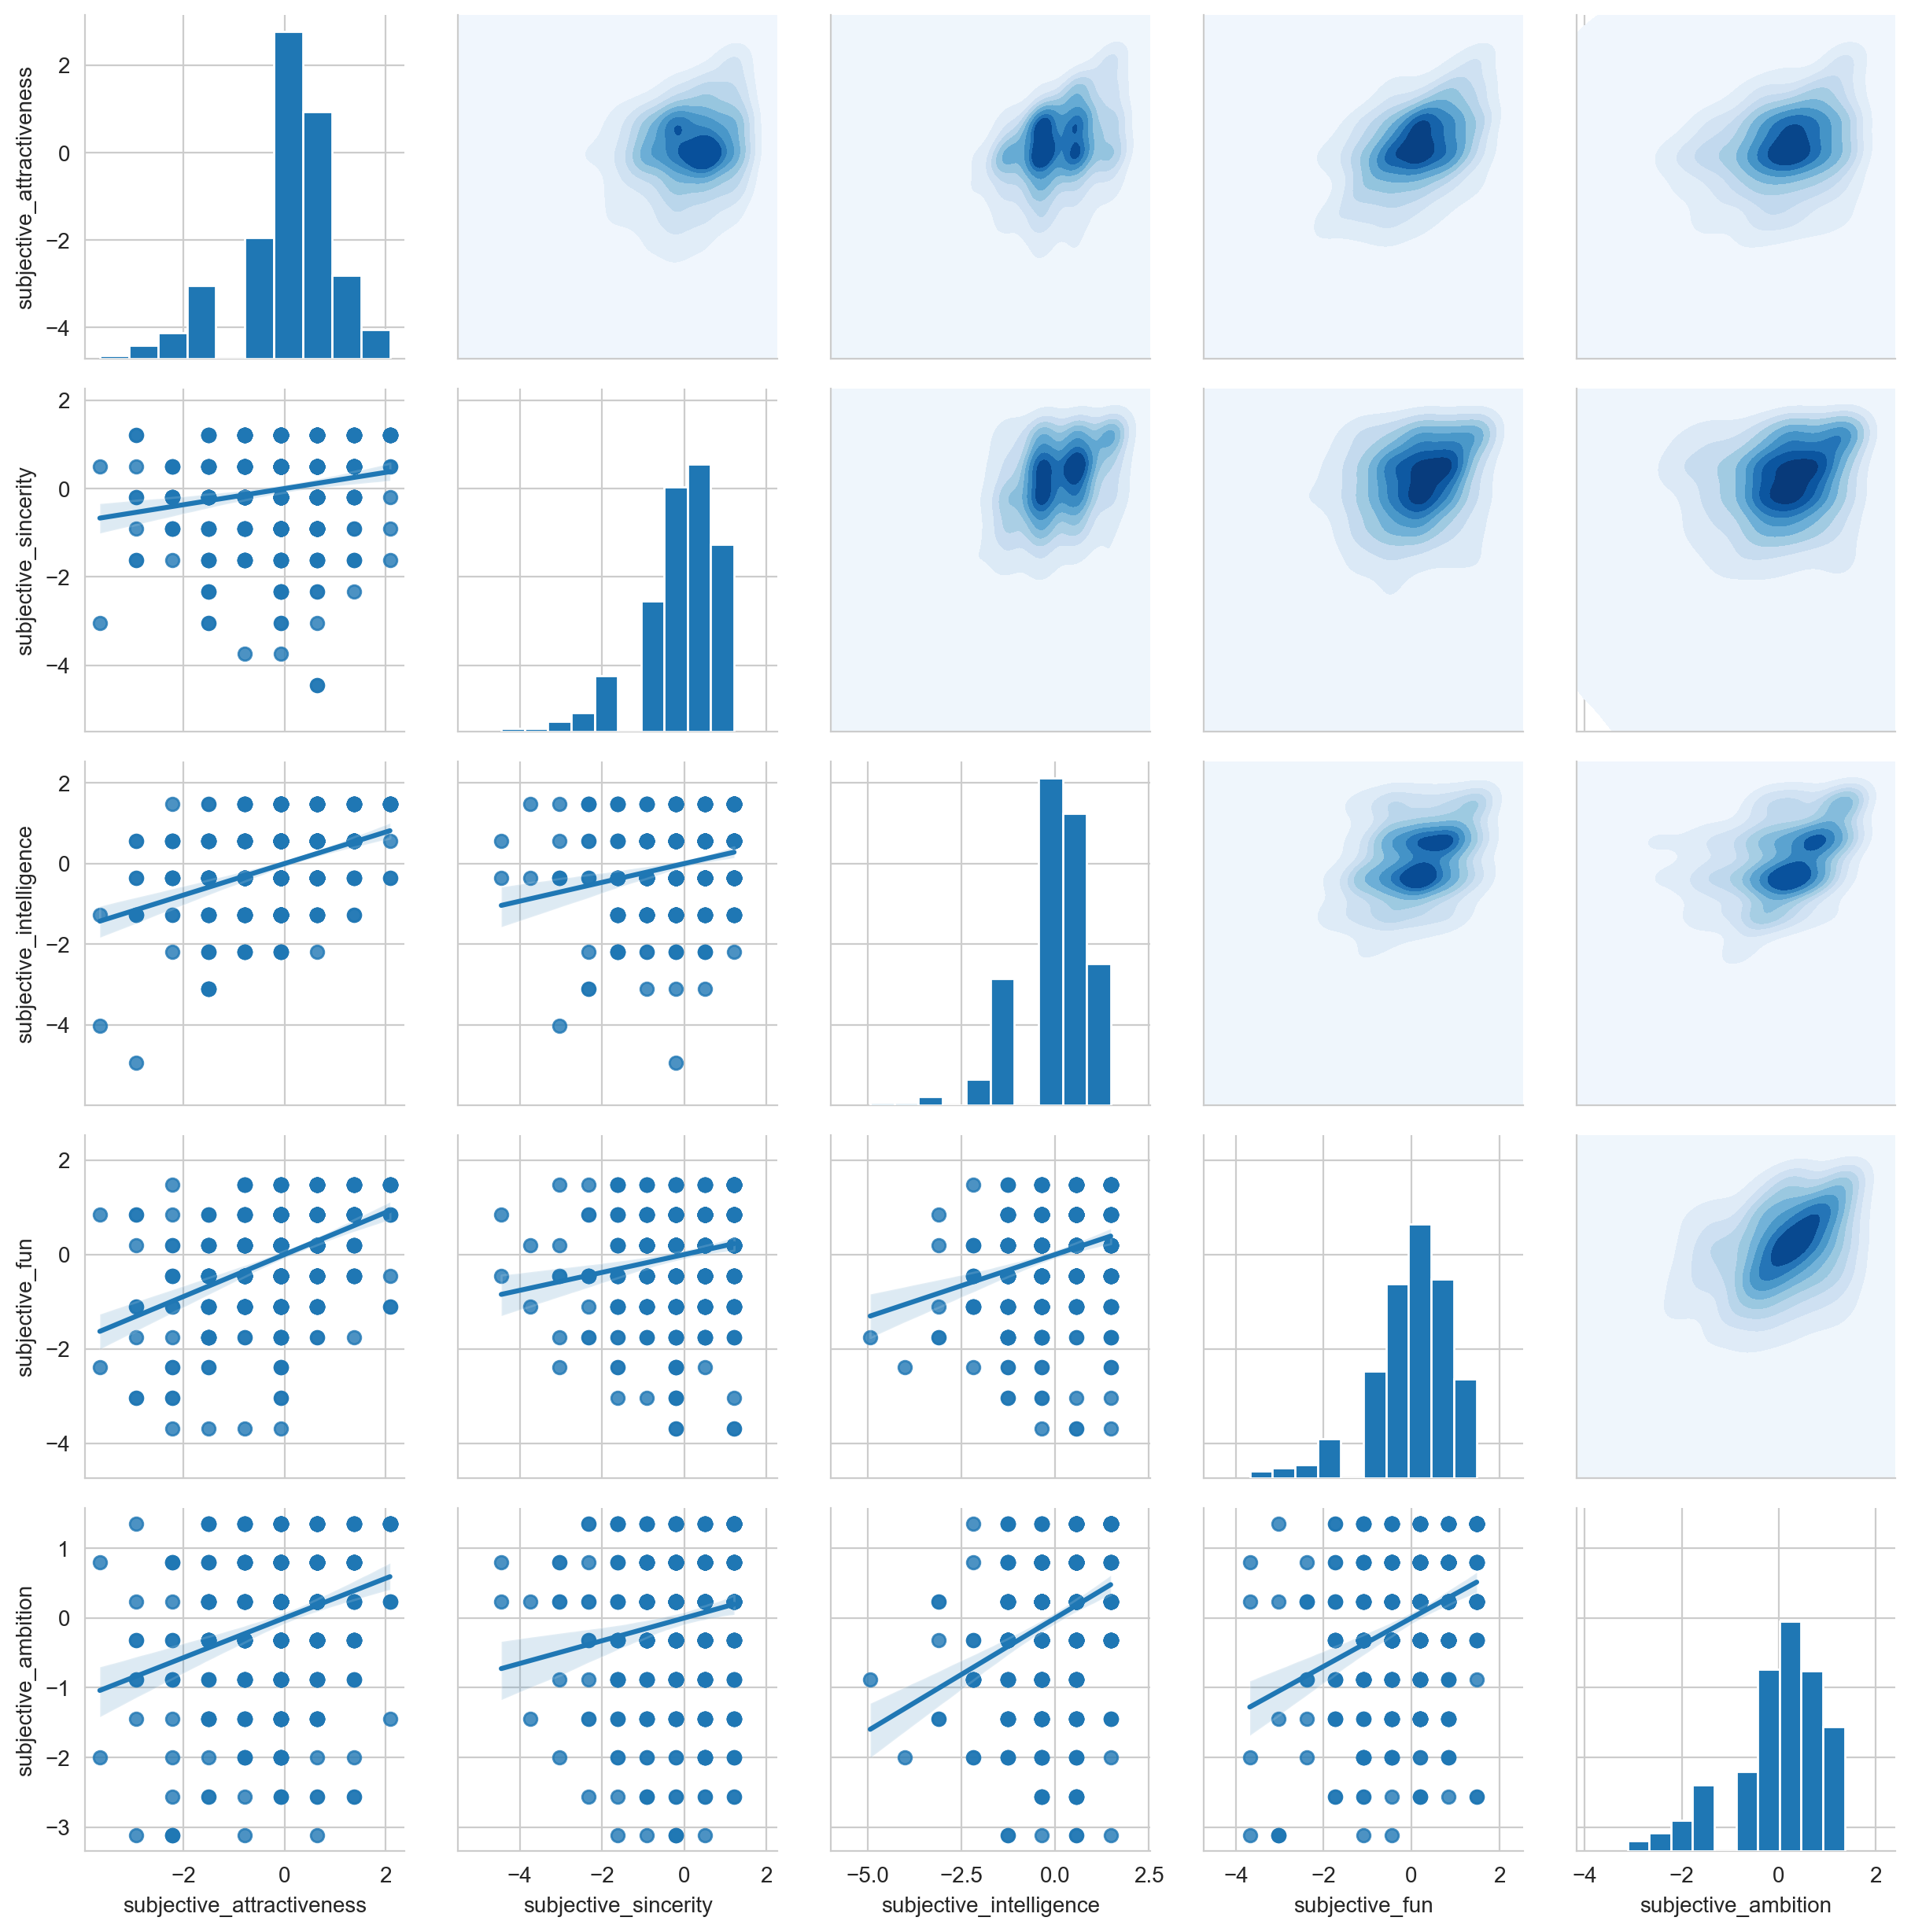

In [86]:
g = sns.PairGrid(subjective)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", fill=True, thresh=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

#### 3.C) Use a heat map to visualize correlation.

In [87]:
subjective_corr = subjective.corr()

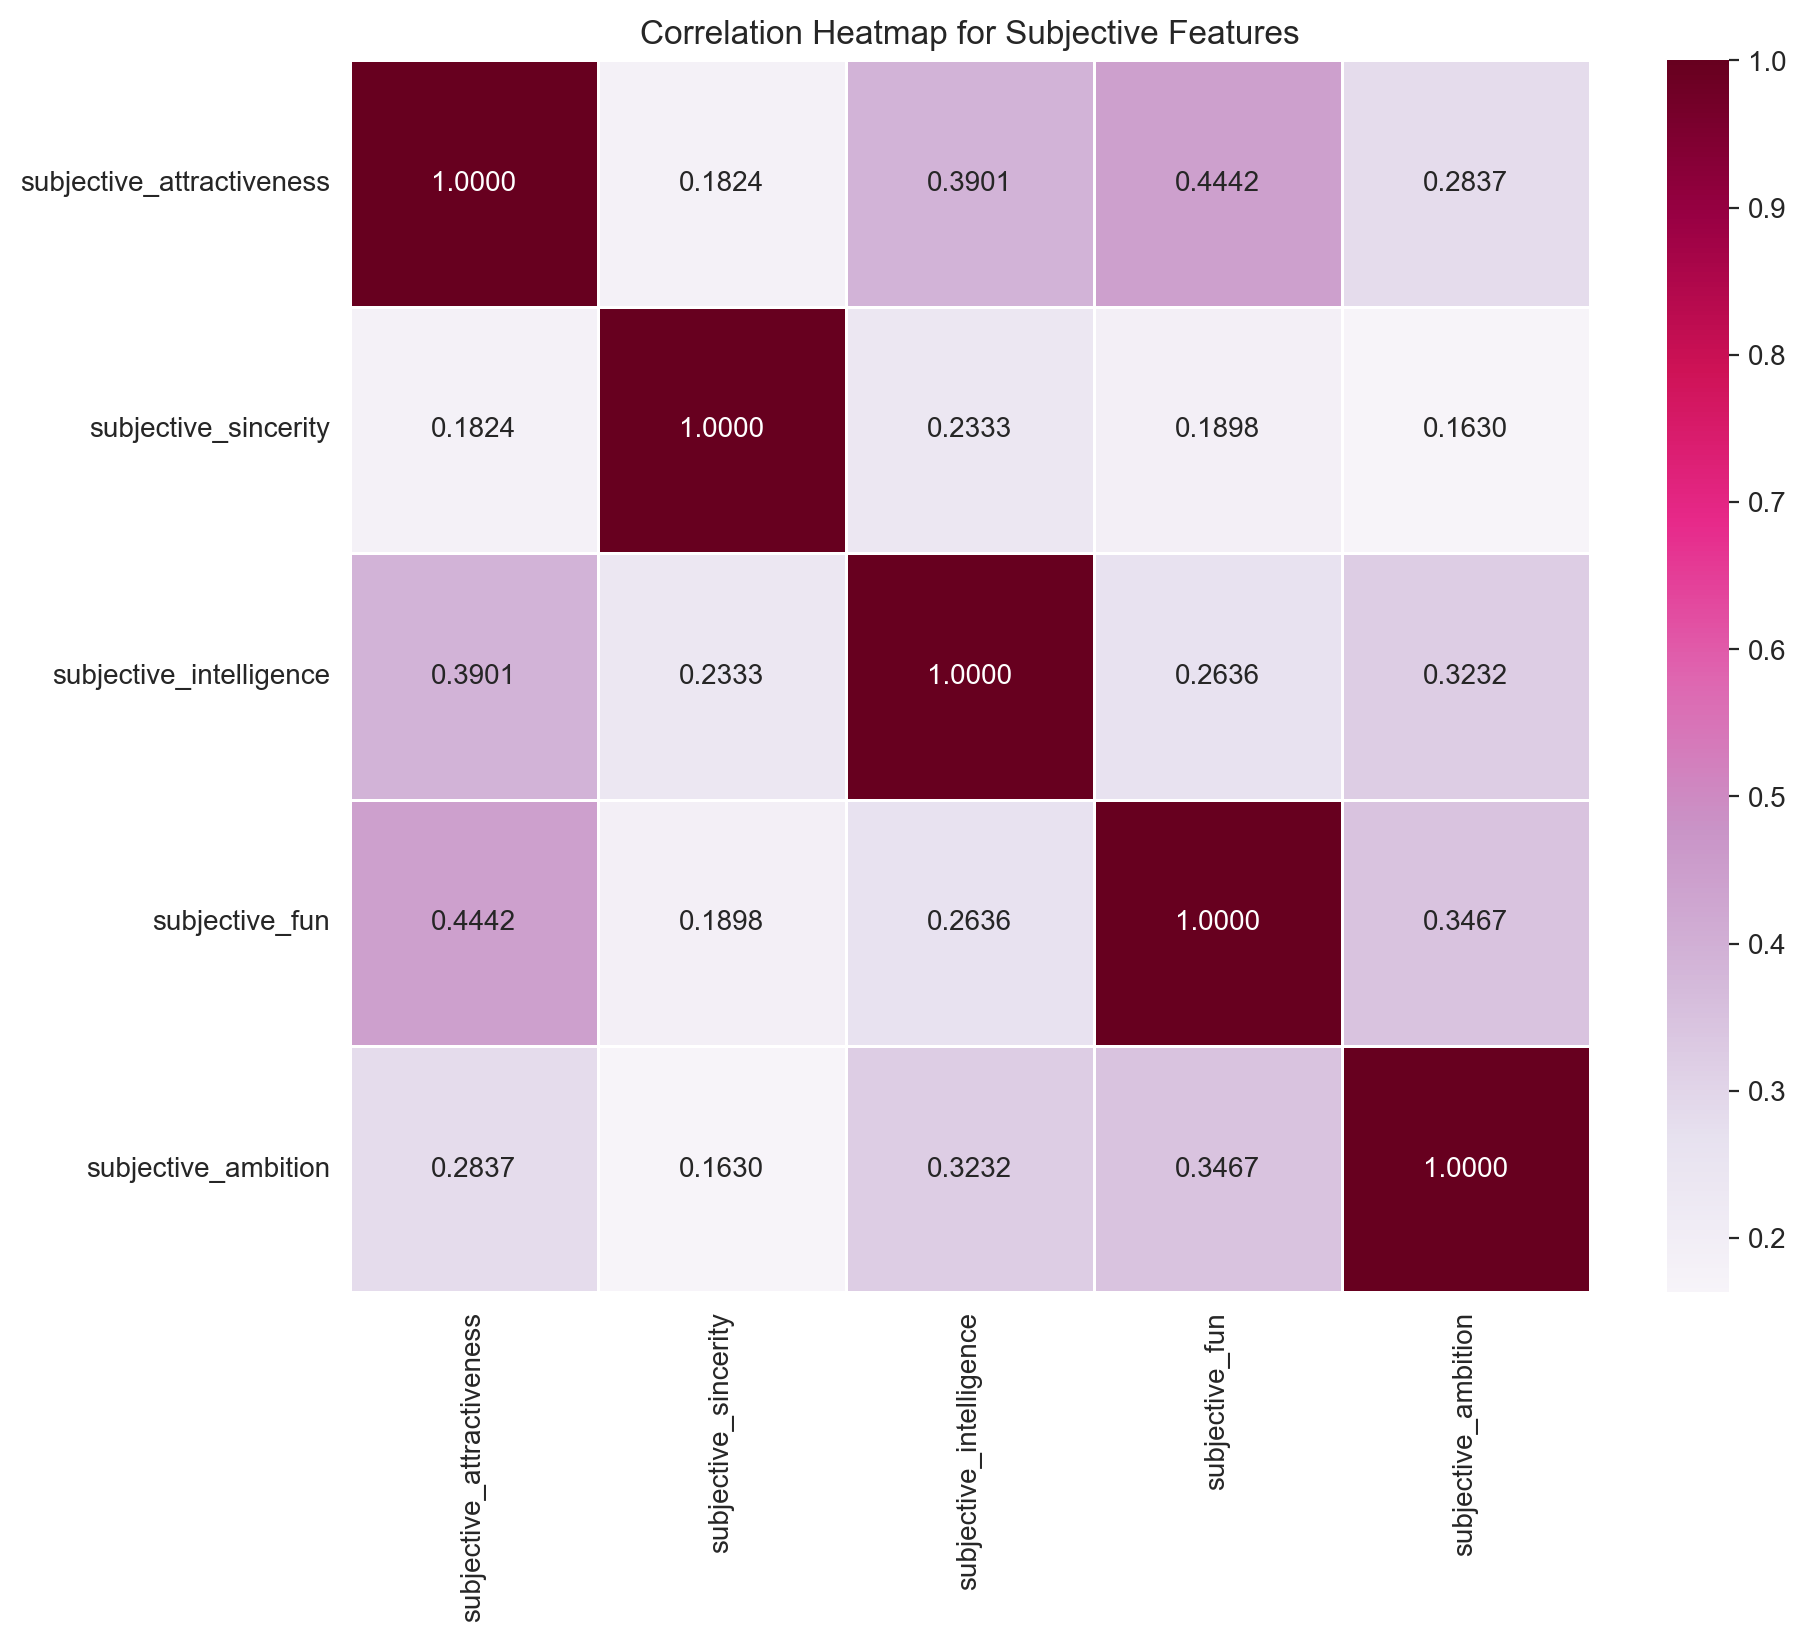

In [88]:
# Set up the heatmap figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(subjective_corr, annot=True, fmt='.4f', cmap='PuRd', linewidths=0.5)

# Add labels and title
plt.title('Correlation Heatmap for Subjective Features')

# Display the heatmap
plt.show()

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — often your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [89]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

#### 4.A) Find the z scores of each column in `preference_cols`.

In [90]:
sd_like = (sd_like - sd_like.mean()) / sd_like.std()
sd_like

like_tvsports  like_sports  like_museums  like_theater  like_shopping
0        -0.911937     0.991623     -2.932342     -2.558505       0.912411
1        -0.911937    -1.290584      0.497160      0.984669      -0.999912
2         1.229305    -1.290584     -0.972626      0.098875       0.912411
3        -1.268811    -2.051320     -0.482697      0.984669      -1.764841
4        -0.198190     0.230888     -0.482697     -0.344021       0.912411
..             ...          ...           ...           ...            ...
546       1.229305     1.371991     -1.952484     -1.229815      -0.617447
547       0.158684     0.611255      0.007231      0.541772       0.912411
548      -0.555064    -0.529848      0.007231      0.098875       0.147482
549      -1.268811    -0.149480      0.007231     -0.786918       0.529946
550      -0.911937     0.611255      1.477018      0.098875       0.529946

[542 rows x 5 columns]

#### 4.B) Visualize correlation using PairGrid.

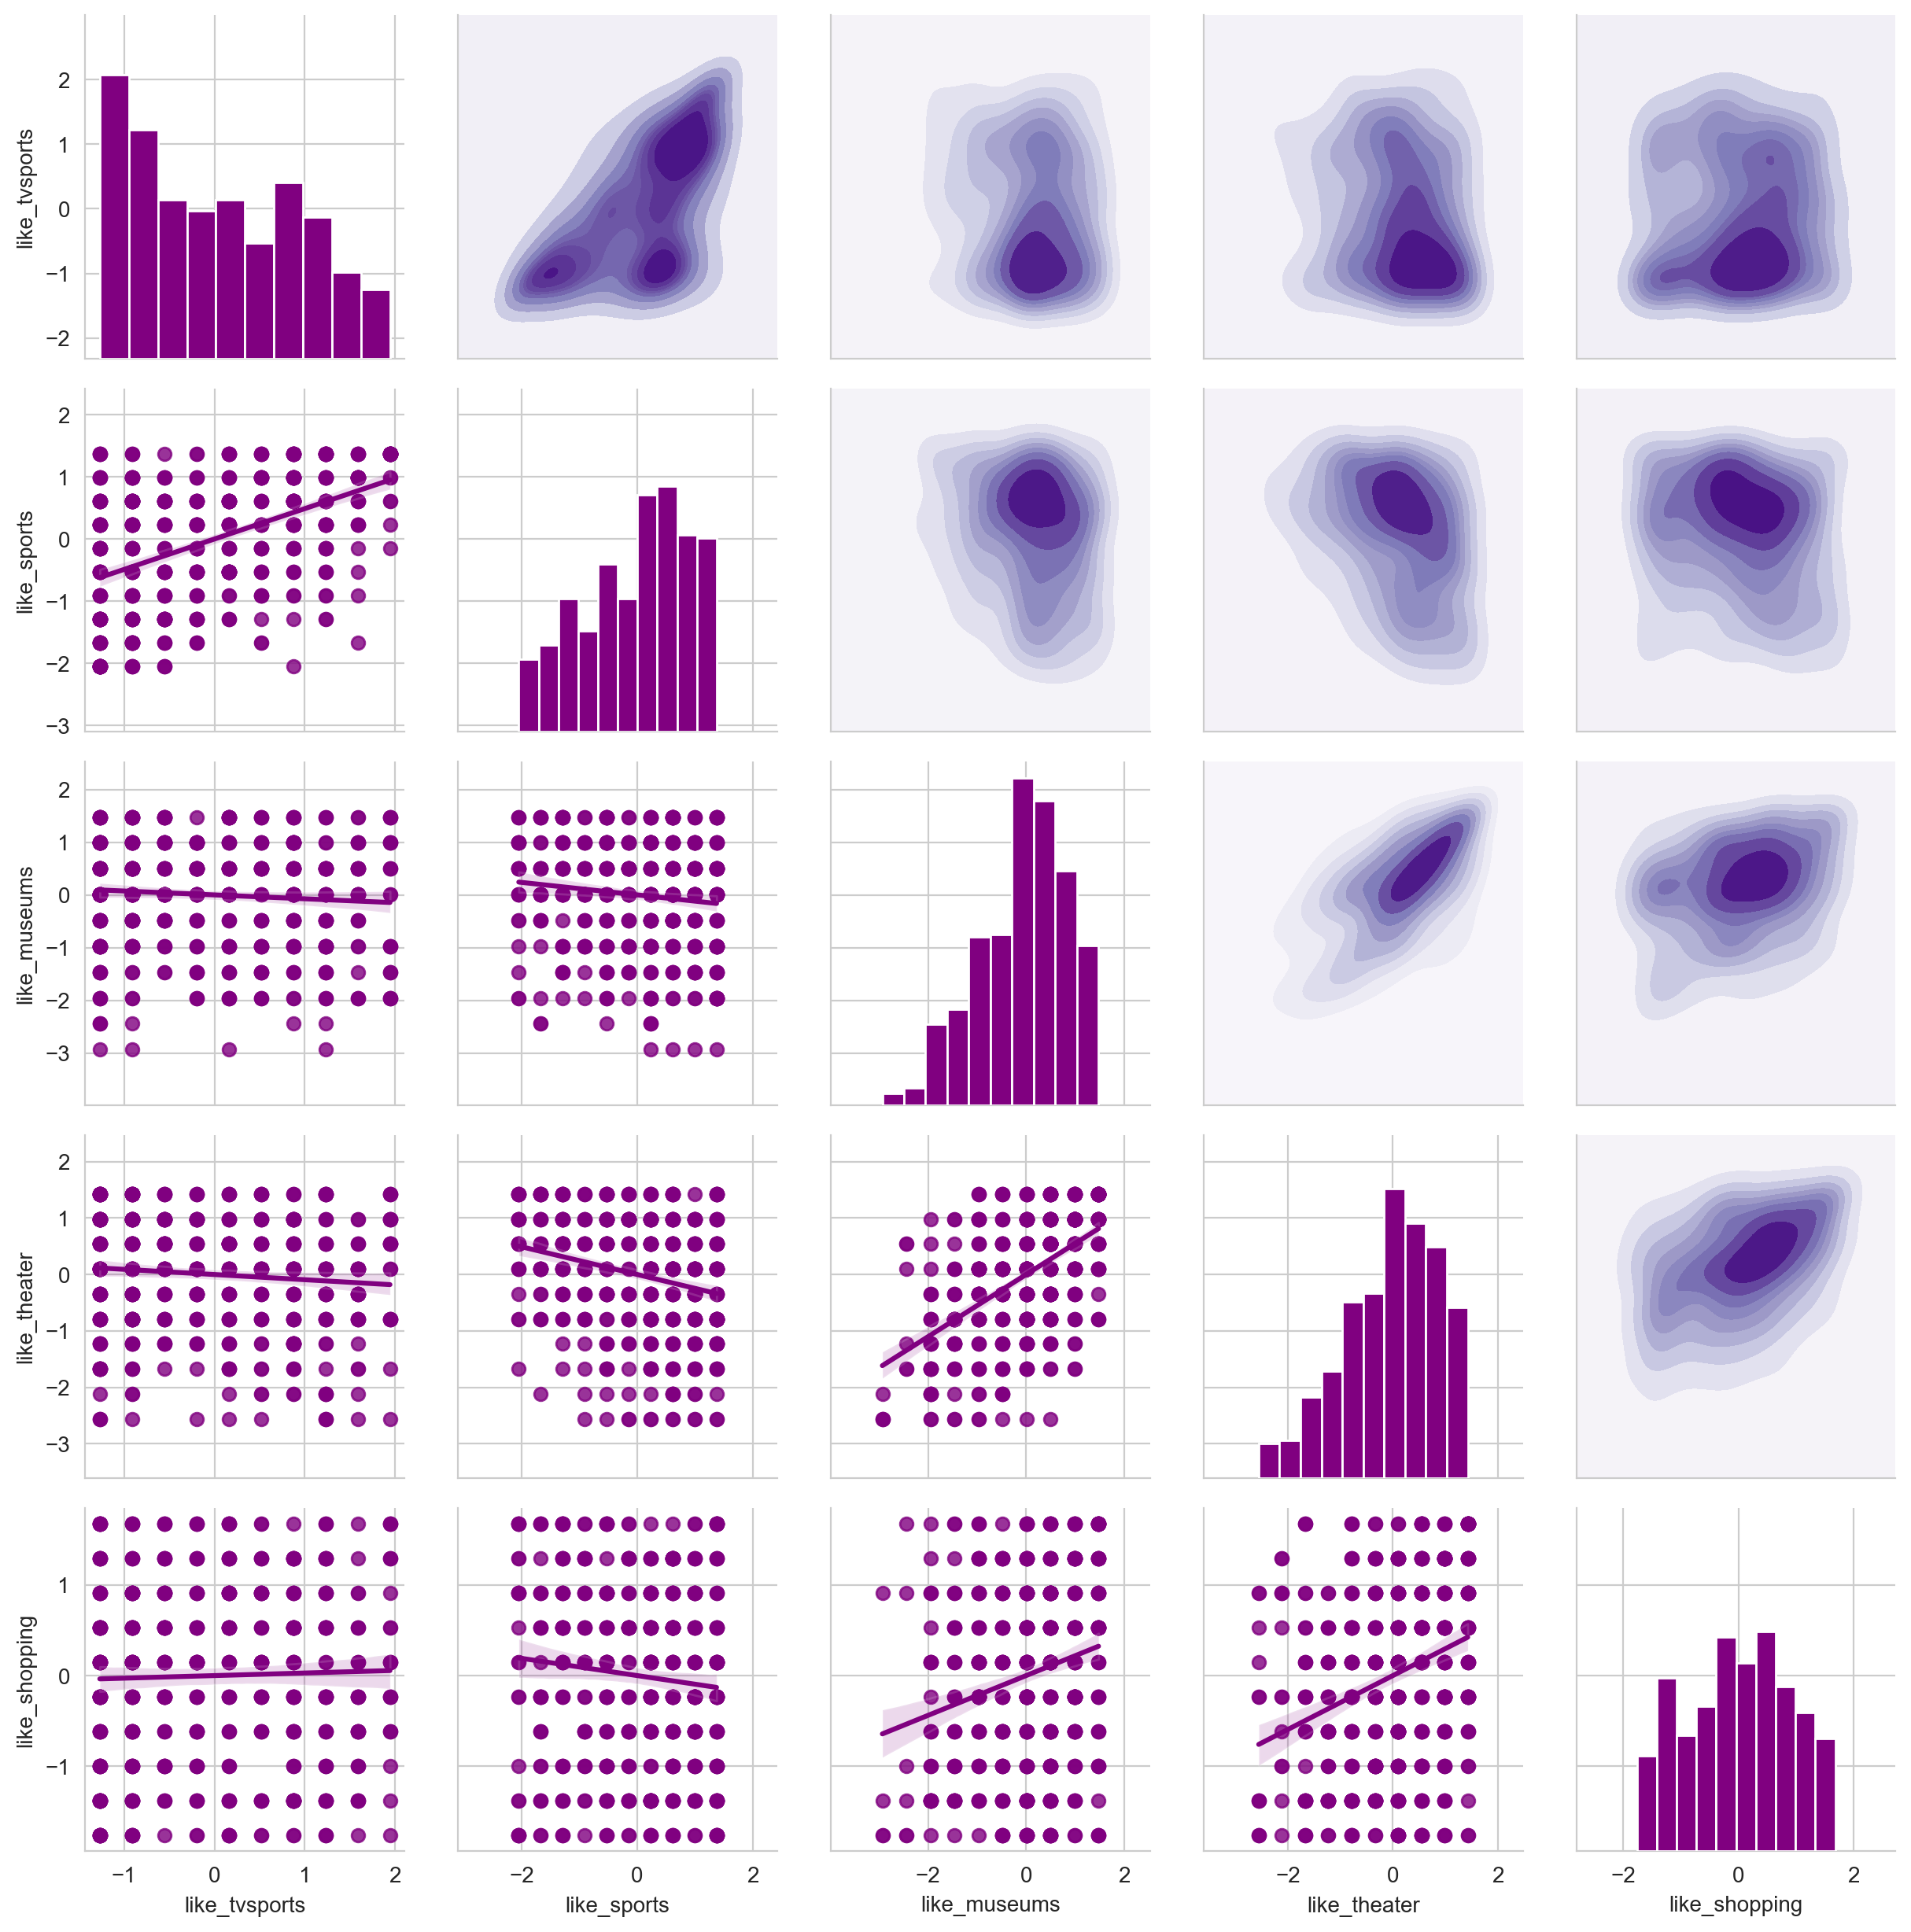

In [91]:
g = sns.PairGrid(sd_like)
g = g.map_lower(sns.regplot, color="purple")
g = g.map_upper(sns.kdeplot, cmap="Purples", fill=True, thresh=False)
g = g.map_diag(plt.hist, color="purple")

plt.show()

#### 4.C) Visualize correlation using a heat map.

In [92]:
preference_corr = sd_like.corr()

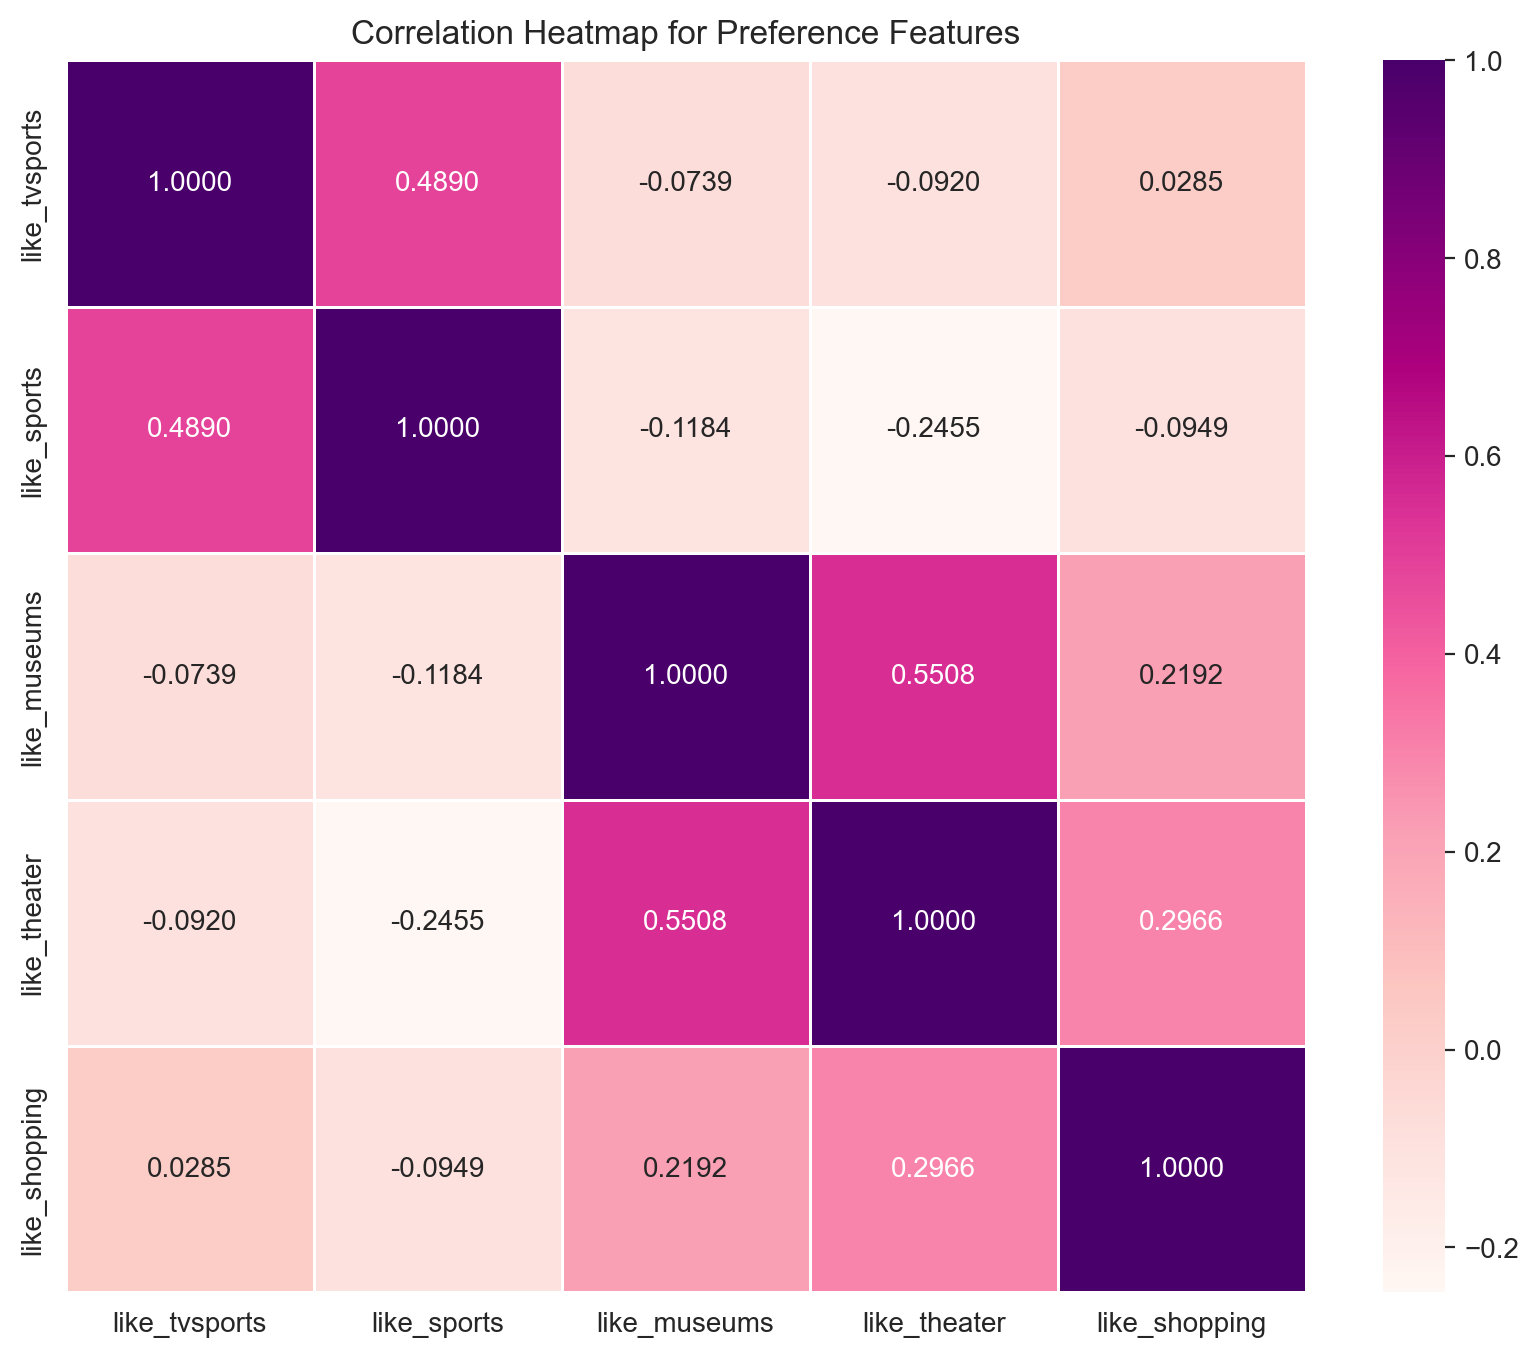

In [93]:
# Set up the heatmap figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(preference_corr, annot=True, fmt='.4f', cmap='RdPu', linewidths=0.5)

# Add labels and title
plt.title('Correlation Heatmap for Preference Features')

# Display the heatmap
plt.show()

---

### 5) Example: Fit PCA on the subjective ratings.

In [94]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective.values)

PCA(n_components=5)

---

#### 5.A) Look at the weights of the principal components.

The principal components (or eigenvectors!) are simply the weights or coefficients on the original variables $X$ that transforms them to $Z$.

In [95]:
subj_exp_var_eigenvals = subjective_pca.explained_variance_

# Create a DataFrame to organize the data
data = {
    'Eigenvalues': subj_exp_var_eigenvals,
}

weights_df = pd.DataFrame(data)

# Display the DataFrame
weights_df

Eigenvalues
0     2.156429
1     0.887610
2     0.736847
3     0.720965
4     0.498149

---

#### 5.B) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.

In [96]:
subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

# Create a DataFrame to organize the data
data = {
    'Eigenvalues': subj_exp_var_eigenvals,
    'Explained Variance (%)': subj_exp_var_pct * 100  # Convert variance ratio to percentage
}

weights_df = pd.DataFrame(data)

# Display the DataFrame
weights_df

Eigenvalues  Explained Variance (%)
0     2.156429               43.128576
1     0.887610               17.752191
2     0.736847               14.736937
3     0.720965               14.419309
4     0.498149                9.962986

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

---

#### 5.C) Transform the subjective data into the principal component space.

The `transform()` function in the PCA will create your new component variable matrix.

In [97]:
subj_to_pcs = subjective_pca.transform(subjective.values)

This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for $0.431 + 0.178 + 0.147 = 75.6 \%$ of the variance.

In [98]:
subj_to_pcs[:,:3]

array([[ 0.67332   ,  0.0343678 , -0.10373029],
       [ 1.34919946,  2.02154958, -2.13681651],
       [-0.94880298, -0.27121403, -0.03920403],
       ...,
       [ 1.27684985,  0.74775641, -0.3676784 ],
       [ 2.37183879, -0.92161414,  0.44827873],
       [ 1.22846879,  0.72770379, -0.34579764]])

---

#### 5.D) PCA-transformed features are not correlated.

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above, where many columns were correlated.

/Users/syhrn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


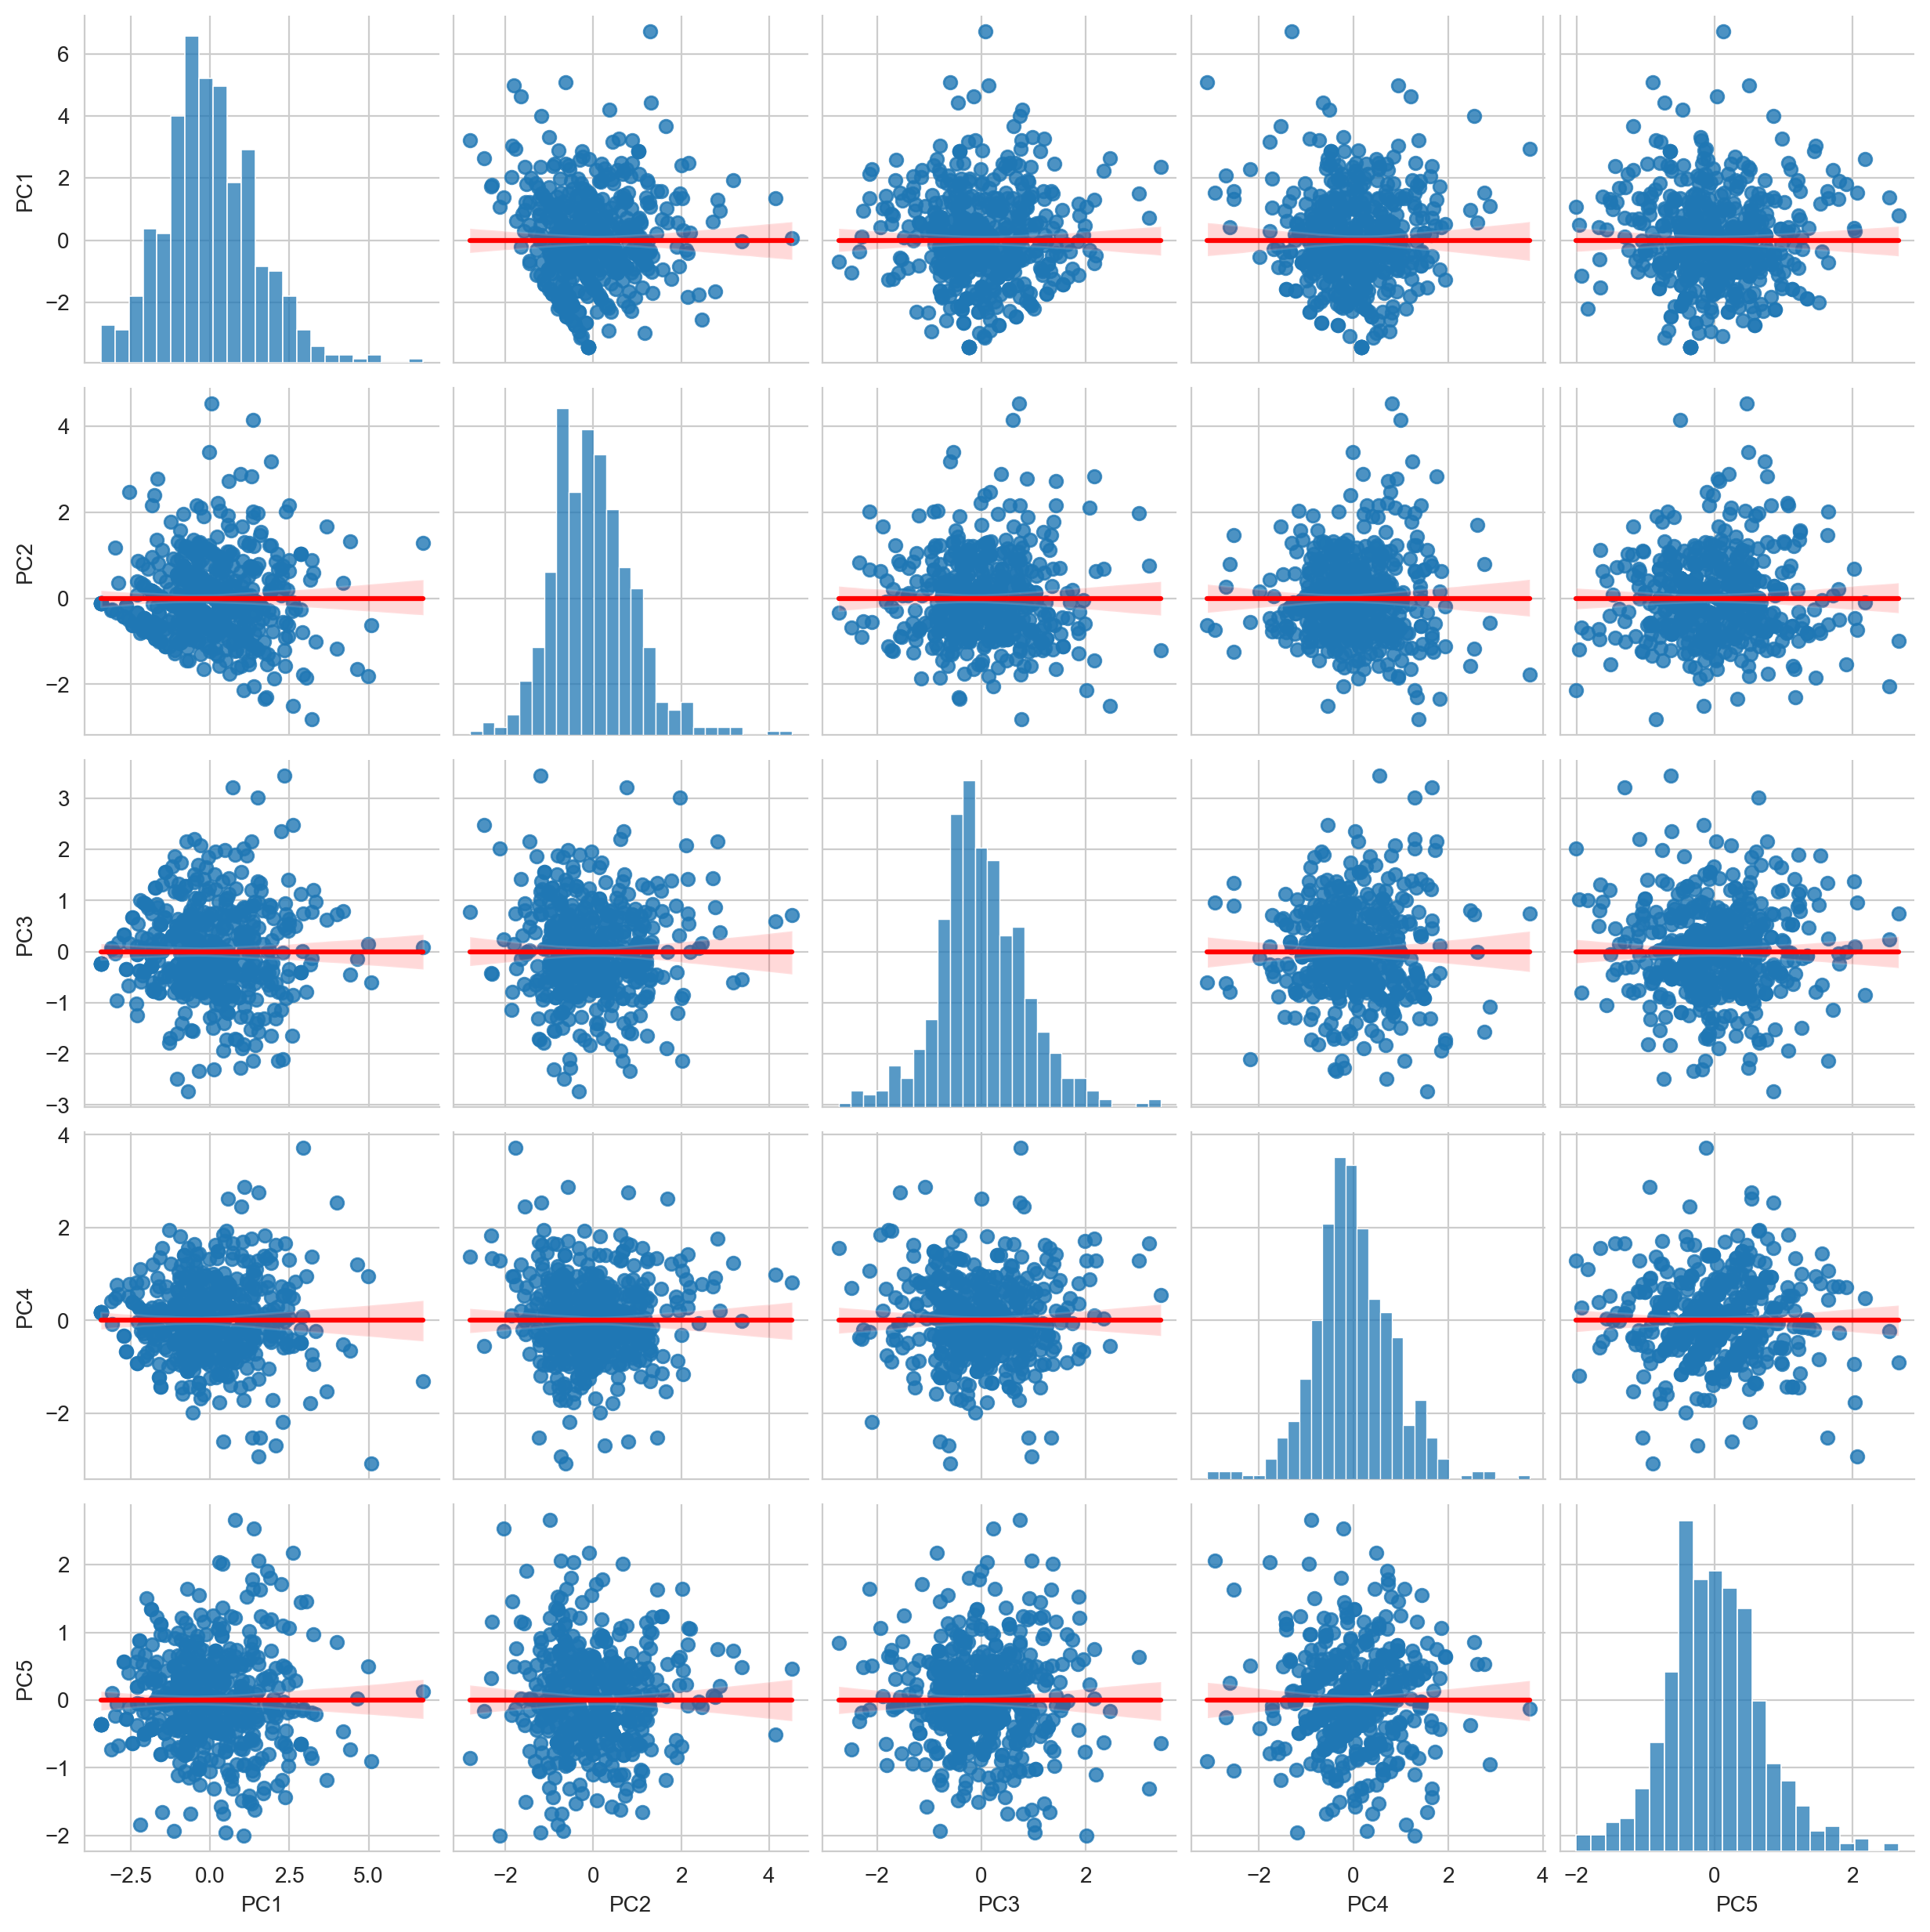

In [99]:
sns.pairplot(pd.DataFrame(subj_to_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg', plot_kws={'line_kws': {'color': 'red'}});

The linear regression line appears almost horizontal which indicates negligible relationship between different PCs. 

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

#### 6.A) Pull out the eigenvector for PC1.

In [100]:
# A:

#### 6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.

In [101]:
# A:

#### 6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [102]:
# A:

#### 6.D) Multiply the original variable values by the eigenvector values.

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [103]:
# A:

#### 6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.

In [104]:
# A:

---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

In [105]:
sd_like.columns

Index(['like_tvsports', 'like_sports', 'like_museums', 'like_theater',
       'like_shopping'],
      dtype='object')

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [106]:
pref_pca = PCA(n_components=5)
pref_pca.fit(sd_like)

PCA(n_components=5)

In [107]:
pref_comp = pref_pca.components_

In [108]:
# Assuming pref_pca is your PCA object and pref_comp contains the principal component weighting vectors
# Replace 'PC1', 'PC2', 'PC3', 'PC4', 'PC5' with the actual names of your principal components

# Extract explained variance ratios and create DataFrame
explained_variance_ratios = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pref_pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pref_pca.explained_variance_ratio_
})

# Extract column names and create DataFrame
column_names = pd.DataFrame({
    'Column Index': np.arange(len(sd_like.columns)),
    'Column Name': sd_like.columns.values
})

# Extract principal component weighting vectors and create DataFrame
principal_components = []
for i, pc in enumerate(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']):
    pc_weights = pd.DataFrame({
        'Column Name': sd_like.columns.values,
        'Weighting Vector': pref_comp[i]
    })
    pc_weights['Principal Component'] = pc
    principal_components.append(pc_weights)

# Concatenate principal component weighting vectors into a single DataFrame
principal_components_df = pd.concat(principal_components, ignore_index=True)

In [109]:
explained_variance_ratios

Principal Component  Explained Variance Ratio
0                 PC1                  0.381657
1                 PC2                  0.268236
2                 PC3                  0.164332
3                 PC4                  0.104002
4                 PC5                  0.081772

In [110]:
column_names

Column Index    Column Name
0             0  like_tvsports
1             1    like_sports
2             2   like_museums
3             3   like_theater
4             4  like_shopping

In [111]:
principal_components_df

Column Name  Weighting Vector Principal Component
0   like_tvsports          0.320753                 PC1
1     like_sports          0.430670                 PC1
2    like_museums         -0.513289                 PC1
3    like_theater         -0.573132                 PC1
4   like_shopping         -0.345970                 PC1
5   like_tvsports          0.649922                 PC2
6     like_sports          0.532192                 PC2
7    like_museums          0.324132                 PC2
8    like_theater          0.265064                 PC2
9   like_shopping          0.345041                 PC2
10  like_tvsports          0.000021                 PC3
11    like_sports         -0.160310                 PC3
12   like_museums         -0.454907                 PC3
13   like_theater         -0.224216                 PC3
14  like_shopping          0.846810                 PC3
15  like_tvsports          0.622452                 PC4
16    like_sports         -0.587489                 PC4
17   like_museums         -0.338228                 PC4
18   like_theater          0.333354                 PC4
19  like_shopping         -0.204665                 PC4
20  like_tvsports          0.295420                 PC5
21    like_sports         -0.400565                 PC5
22   like_museums          0.556896                 PC5
23   like_theater         -0.663222                 PC5
24  like_shopping          0.047721                 PC5

#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [112]:
pref_pcs = pref_pca.transform(sd_like)

In [113]:
pref_pcs[0:3]

array([[ 2.79038922, -1.37876855,  2.52125503, -1.19803181, -0.55922863],
       [-1.32191571, -1.20239102, -1.0868018 ,  0.55530336, -0.176345  ],
       [-0.03460909,  0.13788089,  1.39984296,  1.69857826,  0.31643736]])

#### 7.C) Verify that these columns are uncorrelated.

/Users/syhrn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


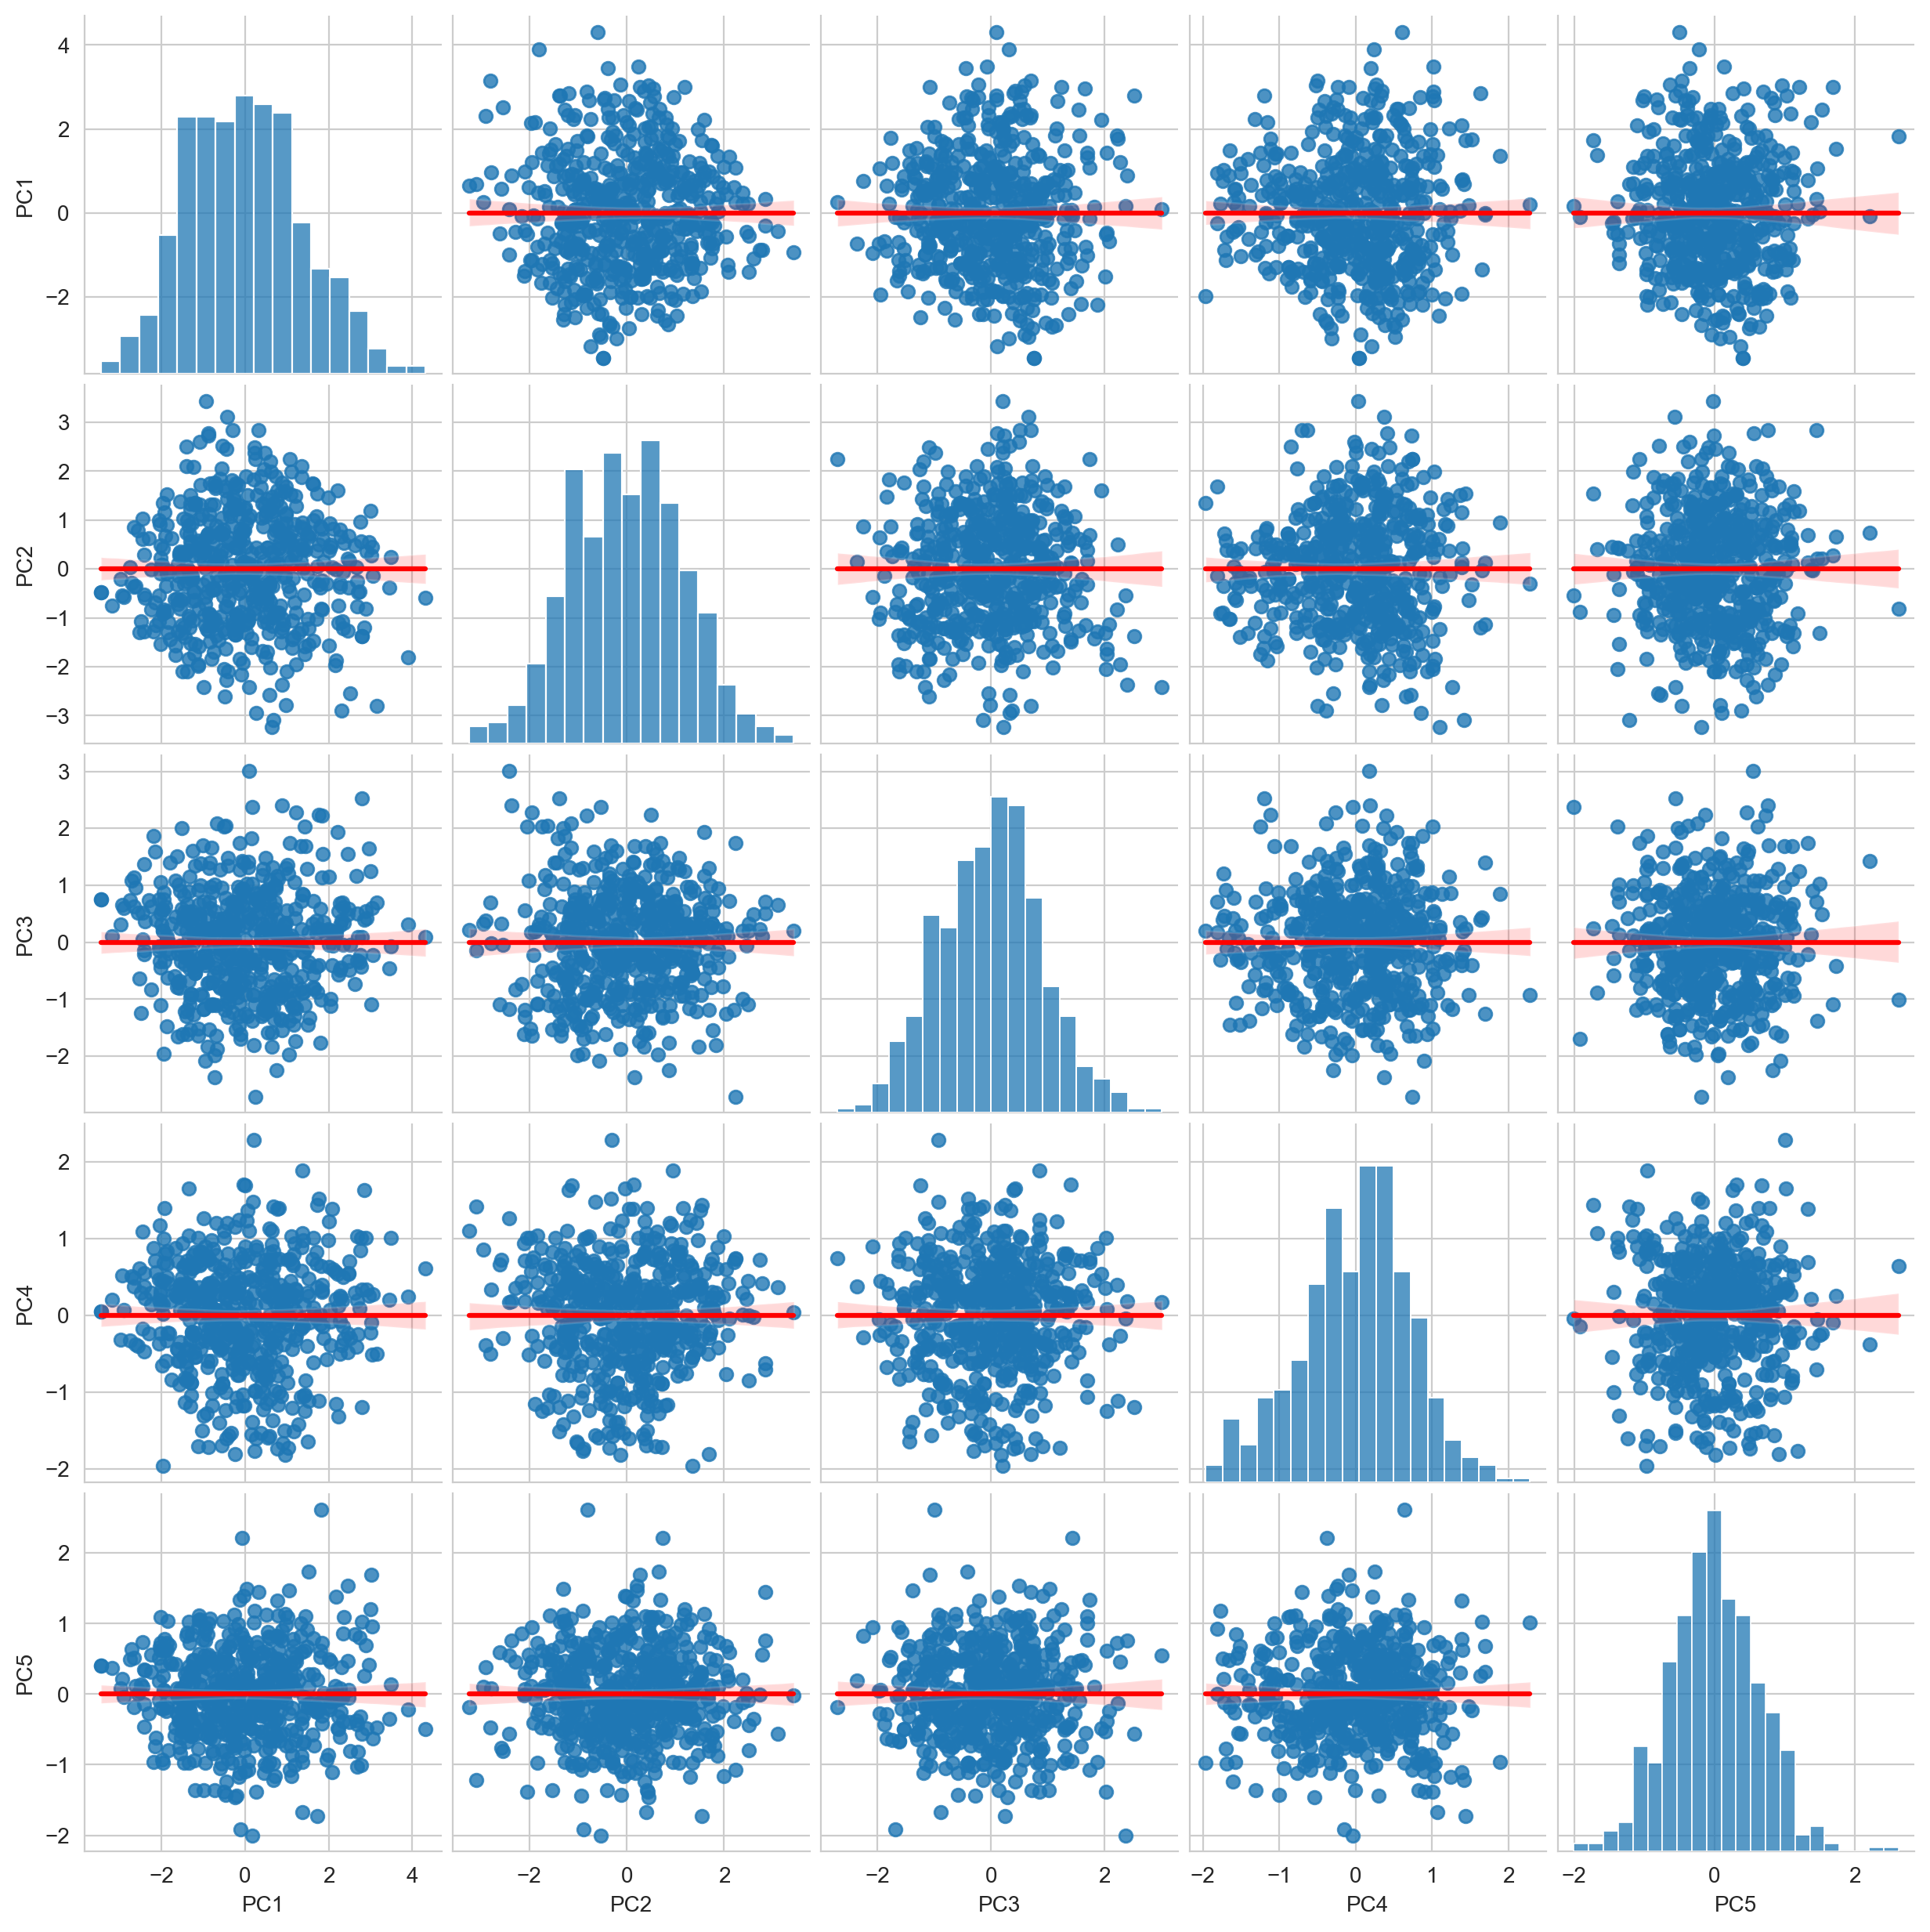

In [114]:
sns.pairplot(pd.DataFrame(pref_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg', plot_kws={'line_kws': {'color': 'red'}});

The linear regression line appears almost horizontal which indicates negligible relationship between different PCs. 

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reading = sd['like_reading'].values

#### 8.A) Linear regression cross-validated on original variables (`sd_like.values`).

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

In [116]:
# Assuming sd_like is your DataFrame containing features and 'reading' is your target variable

# Initialize the linear regression model
linreg = LinearRegression()

# Perform cross-validation and calculate original scores
original_scores = cross_val_score(linreg, sd_like.values, reading, cv=5)

# Create a DataFrame to display results in a table format
results_data = {
    'Feature': sd_like.columns.values,
    'Cross-Validation Scores': original_scores
}

results_df = pd.DataFrame(results_data)

# Add a row for the mean of the cross-validation scores
mean_score = np.mean(original_scores)
mean_row = pd.DataFrame({'Feature': ['Mean'], 'Cross-Validation Scores': [mean_score]})

# Concatenate the mean row to the DataFrame
results_df = pd.concat([results_df, mean_row], ignore_index=True)

# Display the results DataFrame
results_df

Feature  Cross-Validation Scores
0  like_tvsports                -0.004529
1    like_sports                 0.131674
2   like_museums                 0.022378
3   like_theater                 0.179293
4  like_shopping                 0.130844
5           Mean                 0.091932

In [117]:
# Fit the linear regression model to the data
linreg.fit(sd_like.values, reading)

# Extract coefficients and variable names
coefficients = linreg.coef_
variables = sd_like.columns

# Create a DataFrame to display coefficients in a table format
coefficients_data = {
    'Variable': variables,
    'Coefficient': coefficients
}

coefficients_df = pd.DataFrame(coefficients_data)

# Display the coefficients DataFrame
coefficients_df

Variable  Coefficient
0  like_tvsports    -0.179136
1    like_sports    -0.125536
2   like_museums     0.642566
3   like_theater     0.155960
4  like_shopping    -0.199333

#### 8.B) Linear regression on the first principal component.

- What is the mean cross-validation score?

In [118]:
# Assuming pref_pcs contains principal component scores and 'reading' is your target variable

# Initialize the PCA-based linear regression model
pca_linreg = LinearRegression()

# Perform cross-validation and calculate PCA-based scores
pca_scores = cross_val_score(pca_linreg, pref_pcs[:, 0:1], reading, cv=10)

# Create a DataFrame to display results in a table format
results_data = {
    'Cross-Validation Scores': pca_scores
}

results_df = pd.DataFrame(results_data)

# Add a row for the mean of the cross-validation scores
mean_score = np.mean(pca_scores)
mean_row = pd.DataFrame({'Cross-Validation Scores': [mean_score]})

# Concatenate the mean row to the DataFrame
results_df = pd.concat([results_df, mean_row], ignore_index=True)

# Display the results DataFrame
results_df

Cross-Validation Scores
0                 -0.028580
1                 -0.012504
2                  0.242282
3                 -0.060291
4                 -0.049215
5                  0.037473
6                  0.052343
7                  0.155900
8                  0.083389
9                  0.087887
10                 0.050868

#### 8.C) Linear regression on first three principal components.

- What is the mean cross-validation score?

In [119]:
# Perform cross-validation and calculate PCA-based scores
pca_scores_new = cross_val_score(pca_linreg, pref_pcs[:, 0:3], reading, cv=10)

# Create a DataFrame to display results in a table format
results_data_new = {
    'Cross-Validation Scores': pca_scores_new
}

results_df_new = pd.DataFrame(results_data_new)

# Add a row for the mean of the cross-validation scores
mean_score_new = np.mean(pca_scores_new)
mean_row_new = pd.DataFrame({'Cross-Validation Scores': [mean_score_new]})

# Concatenate the mean row to the DataFrame
results_df_new = pd.concat([results_df_new, mean_row_new], ignore_index=True)

# Display the results DataFrame
results_df_new

Cross-Validation Scores
0                  0.015535
1                 -0.097452
2                  0.241443
3                 -0.042711
4                  0.072648
5                  0.059681
6                  0.159839
7                  0.226839
8                  0.082124
9                  0.157095
10                 0.087504

---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.